In [1]:
import os
import numpy as np
import scvelo as scv
from matplotlib import pyplot as plt

# Development version; https://github.com/aron0093/cytopath/tree/development
import cytopath

In [2]:
# Import preprocessed datasets
datasets = [ 'dendate_gyrus',
             'cell_cycle',
             'pancreatic_endocrinogenesis',  
             'mouse_inner_ear',
             'neuronal_activation',
             'cd8_development',
           ]  

adatas = {}
for dataset in datasets:
    adatas[dataset] = scv.read(dataset+'.h5ad')

In [3]:
# Perform undirected sampling analysis
for dataset in adatas.keys():
    cytopath.utils.undirected_simulations(adatas[dataset], sim_number=5000, max_steps=30, num_cores=-2)
    print('Done {}'.format(dataset))


Sampling round: 0


  0%|          | 0/5000 [00:00<?, ?it/s]

Sampling done.
Done dendate_gyrus

Sampling round: 0


  0%|          | 0/1067 [00:00<?, ?it/s]

Sampling done.
Done cell_cycle

Sampling round: 0


  0%|          | 0/3696 [00:00<?, ?it/s]

Sampling done.
Done pancreatic_endocrinogenesis

Sampling round: 0


  0%|          | 0/157 [00:00<?, ?it/s]

Sampling done.
Done mouse_inner_ear

Sampling round: 0


  0%|          | 0/3060 [00:00<?, ?it/s]

Sampling done.
Done neuronal_activation

Sampling round: 0


  0%|          | 0/5000 [00:00<?, ?it/s]

Sampling done.
Done cd8_development


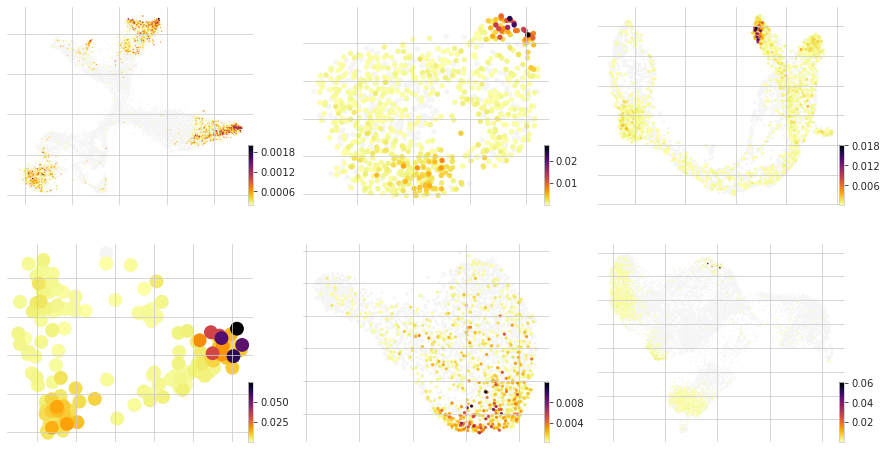

In [4]:
# Plot log frequencies
fig, axs = plt.subplots(ncols=3, nrows=int(np.ceil(len(adatas.keys())/3)), 
                        figsize=(15, 4*np.ceil(len(adatas.keys())/3)))

dataset_bases = ['tsne', 'umap', 'umap', 'pca', 'umap', 'umap']
for i, dataset in enumerate(adatas.keys()):
    
    adata_ = adatas[dataset]
    basis = [basis_ for basis_ in ['X_umap', 'X_tsne', 'X_pca'] if basis_ in adata_.obsm.keys()][0]
    
    ax_ = scv.pl.scatter(adata_, basis=dataset_bases[i], color='whitesmoke',
                   dpi=300, title='',
                   show=False, ax=axs.flat[i])
    
    scv.pl.scatter(adata_, basis=dataset_bases[i], color='log_terminal_state_freq',
                   dpi=300, color_map='inferno_r', title='',
                   show=False, ax=ax_)
                                               

In [5]:
# Get function signature
?cytopath.utils.undirected_simulations